In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## Sigmoid function

In [2]:
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

In [3]:
# Note that the bias is included in w, which means that the first entry of X must be 1
def net_input(X, w):
    return np.dot(X, w)

In [4]:
def logistic(z):
    return 1.0 / (1 + np.exp(-z))

In [5]:
def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

In [6]:
logistic_activation(X, w)

0.8879529614430097

In [13]:
# Another example
# Recall that to understand the format of the weight matrix, we can think of the input as a column vector.
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
# This mimic how an example is stored: as a single row.
A = np.array([[1, 0.1, 0.4, 0.6]])
# A[0] extracts the first row, which can be multiplied with W through dot product
Z = np.dot(W, A[0])
y = logistic(Z)
print(Z)
print(y)
# Note that y cannot be interpreted as class probabilities since the three number do not add up to 1.

[1.78 0.76 1.65]
[0.85569687 0.68135373 0.83889105]


In [29]:
# In pytorch
torch.sigmoid(torch.from_numpy(Z))

tensor([0.8557, 0.6814, 0.8389], dtype=torch.float64)

## Softmax

In [11]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [14]:
y_prob = softmax(Z)
print(y_prob)

[0.44668973 0.16107406 0.39223621]


In [17]:
# Softmax in pytorch
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

In [21]:
# Another softmax in torch.nn
torch.nn.Softmax(dim=0)(torch.from_numpy(Z))

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

## Hypobolic tangent (tanh)

In [22]:
def tanh(z):
    ep = np.exp(z)
    en = np.exp(-z)
    return (ep-en) / (ep + en)

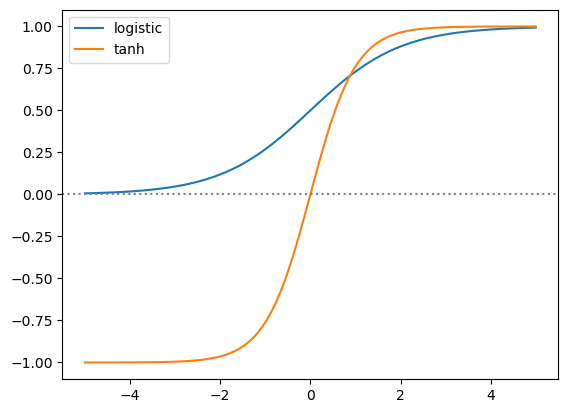

In [27]:
# Visualize logistic and tanh
x = np.linspace(-5, 5, 100)
y_logistic = logistic(x)
y_tanh = tanh(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y_logistic, label="logistic")
ax.plot(x, y_tanh, label="tanh")
ax.axhline(y=0, linestyle="dotted", color='grey')
ax.legend()


In [28]:
# In pytorch
torch.tanh(torch.from_numpy(x))

tensor([-0.9999, -0.9999, -0.9999, -0.9998, -0.9998, -0.9998, -0.9997, -0.9996,
        -0.9995, -0.9994, -0.9993, -0.9992, -0.9990, -0.9987, -0.9985, -0.9981,
        -0.9977, -0.9972, -0.9966, -0.9958, -0.9949, -0.9937, -0.9923, -0.9906,
        -0.9885, -0.9859, -0.9828, -0.9790, -0.9743, -0.9687, -0.9618, -0.9535,
        -0.9434, -0.9311, -0.9163, -0.8986, -0.8772, -0.8518, -0.8216, -0.7859,
        -0.7441, -0.6955, -0.6396, -0.5761, -0.5047, -0.4256, -0.3395, -0.2473,
        -0.1504, -0.0505,  0.0505,  0.1504,  0.2473,  0.3395,  0.4256,  0.5047,
         0.5761,  0.6396,  0.6955,  0.7441,  0.7859,  0.8216,  0.8518,  0.8772,
         0.8986,  0.9163,  0.9311,  0.9434,  0.9535,  0.9618,  0.9687,  0.9743,
         0.9790,  0.9828,  0.9859,  0.9885,  0.9906,  0.9923,  0.9937,  0.9949,
         0.9958,  0.9966,  0.9972,  0.9977,  0.9981,  0.9985,  0.9987,  0.9990,
         0.9992,  0.9993,  0.9994,  0.9995,  0.9996,  0.9997,  0.9998,  0.9998,
         0.9998,  0.9999,  0.9999,  0.99